# 2023 vs. 2024: Exploratory Data Analysis & Comparative performance

- Análise mercadologica das corridas
- Aumento do hype
- Maior participação de jovens
- Diminuição da performance
- Estudo das maiores reincidências (agrupamentos e tals...)
- Estudo dos avanços e retrocessos (as pessoas geralmente melhoram ou pioram? Qual o máximo que dá pra melhorar em um ano?)
- Tentar fazer alguma previsão

#### Hipóteses
- Corredores reincidentes são melhores!
- Corredores mais velhos são melhores!
- Existe um grupo específico com maior chance de reincidência!

## 0. Imports

In [18]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

## 1. Data extraction

In [19]:
dir_path = r'..\data\treated'
files = os.listdir(dir_path)
dfs = {}

for _file in files:
    file_path = os.path.join(dir_path, _file)
    df = pd.read_parquet(file_path)
    df['year'] = int(_file.replace('.parquet', '').replace('results_', ''))
    dfs[_file.replace('.parquet', '')] = df

df = pd.concat([dfs['results_2024'], dfs['results_2023']], ignore_index=True)


In [20]:
counter = pd.DataFrame(df.groupby('athlete').size().sort_values(ascending=False)).reset_index()
counter.columns=['athlete', 'counter']
counter.groupby('counter').size()

counter
1    15036
2     2300
3       20
4        3
5        1
7        1
dtype: int64

In [21]:
counter.loc[counter['counter'] == 2].sample(10)

,athlete,counter
1981,EDMAR CAMILO BENTO,2
1977,EDMUNDO REINALDO DE SOUZA,2
432,ALEXANDRE GONZAGA DE SOUZA\nPEIXOTO,2
1963,EDUARDA GONZAGA SILVA,2
841,MARIA CLARA TEODORO PIRES,2
964,MANOEL DE MOURA BARROS JUNIOR,2
994,LUIZ FERNANDO REZENDE CALDEIRA,2
1016,LUCIANO DOS ANJOS NONATO,2
1024,LUCIANA LUIZA DOS SANTOS,2
1918,ELISA BADARO SILVA,2


## 2. Check data quality

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           19720 non-null  int64  
 1   num           19720 non-null  int64  
 2   athlete       19720 non-null  object 
 3   gender        19720 non-null  object 
 4   age           19720 non-null  int64  
 5   group         19720 non-null  object 
 6   ag            19700 non-null  float64
 7   c             19720 non-null  object 
 8   team          19720 non-null  object 
 9   time          19720 non-null  object 
 10  distance      19720 non-null  object 
 11  part_time_h   19720 non-null  int64  
 12  part_time_m   19720 non-null  int64  
 13  part_time_s   19720 non-null  int64  
 14  total_time_s  19720 non-null  int64  
 15  total_time_m  19720 non-null  float64
 16  total_time_h  19720 non-null  float64
 17  dist_num      19720 non-null  int64  
 18  pace          19720 non-nu

In [23]:
df.describe()

,pos,num,age,ag,part_time_h,part_time_m,part_time_s,total_time_s,total_time_m,total_time_h,dist_num,year
count,19720.000000,19720.000000,19720.000000,19700.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000
mean,1762.182809,6312.573529,38.610041,195.853350,0.189300,35.433215,29.444270,2836.917901,47.281965,0.788033,6.005071,2023.575355
std,1311.150288,3976.380134,13.011585,174.743207,0.439697,14.237690,17.299366,1199.005143,19.983419,0.333057,2.003844,0.494302
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,936.000000,15.600000,0.260000,5.000000,2023.000000
25%,627.000000,3052.750000,30.000000,58.000000,0.000000,30.000000,15.000000,2093.000000,34.883333,0.581389,5.000000,2023.000000
50%,1474.500000,6003.000000,39.000000,142.000000,0.000000,37.000000,29.000000,2522.000000,42.033333,0.700556,5.000000,2024.000000
75%,2707.000000,9186.500000,47.000000,292.000000,0.000000,45.000000,44.000000,3254.000000,54.233333,0.903889,5.000000,2024.000000
max,5251.000000,16901.000000,86.000000,826.000000,3.000000,59.000000,59.000000,11929.000000,198.816667,3.313611,10.000000,2024.000000


In [24]:
values = df['gender'].unique()
print(f'Gender variations: {values}')

values = sorted(df['group'].unique())
print(f'Group variations: {values}')

Gender variations: ['F' 'M']
Group variations: ['F0014', 'F1519', 'F2024', 'F2529', 'F3034', 'F3539', 'F4044', 'F4549', 'F5054', 'F5559', 'F6064', 'F6569', 'F7074', 'F7579', 'F8084', 'M0014', 'M1519', 'M2024', 'M2529', 'M3034', 'M3539', 'M4044', 'M4549', 'M5054', 'M5559', 'M6064', 'M6569', 'M7074', 'M7579', 'M8084', 'M8589']


## 3. Data comprehention

### 3.1. Athletes

#### 3.1.1. Total athletes

In [25]:
total_2023 = df.loc[df['year'] == 2023, 'num'].count()
total_2024 = df.loc[df['year'] == 2024, 'num'].count()
print(f'Total athletes in 2023: {total_2023}\nTotal athletes in 2024: {total_2024}')

variacao = (total_2024 - total_2023) / total_2023
sinal = '+' if variacao > 0 else '-'
variacao_str = f'{sinal}{variacao:.1%}'
print(f'Vriation of {variacao_str} athletes between 2023-24 editions')

Total athletes in 2023: 8374
Total athletes in 2024: 11346
Vriation of +35.5% athletes between 2023-24 editions


#### 3.1.2. Total athletes vs. distance

In [26]:
total_2023_5 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 5), 'num'].count()
total_2023_10 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 10), 'num'].count()
total_2023_5_percent = total_2023_5 / (total_2023_5+total_2023_10)
total_2023_10_percent = total_2023_10 / (total_2023_5+total_2023_10)

total_2024_5 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 5), 'num'].count()
total_2024_10 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 10), 'num'].count()
total_2024_5_percent = total_2024_5 / (total_2024_5+total_2024_10)
total_2024_10_percent = total_2024_10 / (total_2024_5+total_2024_10)

print(f'2023 distance distribuition: {total_2023_5} 5km vs {total_2023_10} 10km ({total_2023_5_percent:.1%} vs {total_2023_10_percent:.1%})')
print(f'2024 distance distribuition: {total_2024_5} 5km vs {total_2024_10} 10km ({total_2024_5_percent:.1%} vs {total_2024_10_percent:.1%})')

2023 distance distribuition: 6508 5km vs 1866 10km (77.7% vs 22.3%)
2024 distance distribuition: 9248 5km vs 2098 10km (81.5% vs 18.5%)


#### 3.1.3. Total athletes vs. gender

In [27]:
total_2023_m = df.loc[(df['year'] == 2023) & (df['gender'] == 'M'), 'num'].count()
total_2023_f = df.loc[(df['year'] == 2023) & (df['gender'] == 'F'), 'num'].count()
total_2023_m_percent = total_2023_m / (total_2023_m+total_2023_f)
total_2023_f_percent = total_2023_f / (total_2023_m+total_2023_f)

total_2024_m = df.loc[(df['year'] == 2024) & (df['gender'] == 'M'), 'num'].count()
total_2024_f = df.loc[(df['year'] == 2024) & (df['gender'] == 'F'), 'num'].count()
total_2024_m_percent = total_2024_m / (total_2024_m+total_2024_f)
total_2024_f_percent = total_2024_f / (total_2024_m+total_2024_f)

print(f'2023 gender distribuition: {total_2023_m} M vs {total_2023_f} F ({total_2023_m_percent:.1%} vs {total_2023_f_percent:.1%})')
print(f'2024 gender distribuition: {total_2024_m} M vs {total_2024_f} F ({total_2024_m_percent:.1%} vs {total_2024_f_percent:.1%})')

2023 gender distribuition: 4253 M vs 4121 F (50.8% vs 49.2%)
2024 gender distribuition: 5438 M vs 5908 F (47.9% vs 52.1%)


#### 3.1.4. Total athletes vs. ages

In [28]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')
pivot_ages_transp = pivot_ages.T

pivot_ages_transp['2023_percent'] = pivot_ages_transp[2023] / pivot_ages_transp[2023].sum()
pivot_ages_transp['2024_percent'] = pivot_ages_transp[2024] / pivot_ages_transp[2024].sum()

pivot_ages = pivot_ages_transp.T
pivot_ages


C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_25908\1443749921.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')


age_group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
year,,,,,,,,,
2023,51.000000,471.000000,1289.000000,2445.000000,2537.000000,1078.000000,368.000000,62.000000,2.000000
2024,37.000000,820.000000,2320.000000,3189.000000,2995.000000,1368.000000,424.000000,65.000000,11.000000
2023_percent,0.006142,0.056726,0.155245,0.294472,0.305552,0.129833,0.044321,0.007467,0.000241
2024_percent,0.003295,0.073025,0.206608,0.283997,0.266720,0.121827,0.037759,0.005789,0.000980


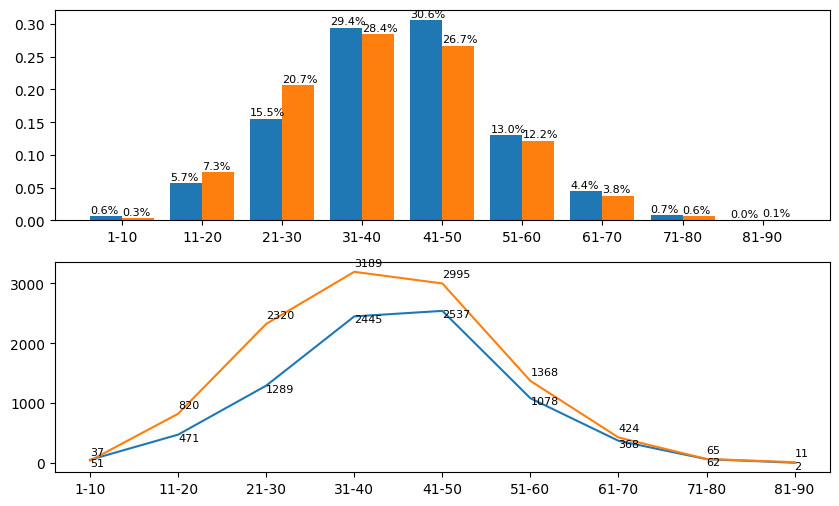

In [29]:
fig, axs = plt.subplots(nrows=2, figsize=(10,6))

bar_width = 0.4

index = pivot_ages_transp.index
xs = np.arange(len(index))
percent_2023 = pivot_ages_transp['2023_percent'].values
percent_2024 = pivot_ages_transp['2024_percent'].values

axs[0].bar(x=xs-bar_width/2, height=percent_2023, width=bar_width)
axs[0].bar(x=xs+bar_width/2, height=percent_2024, width=bar_width)

total_2023 = pivot_ages_transp[2023].values
total_2024 = pivot_ages_transp[2024].values

axs[1].plot(total_2023)
axs[1].plot(total_2024)

for i, x in enumerate(xs):
    p_2023 = percent_2023[i]
    axs[0].annotate(text=f'{p_2023:.1%}', xy=(x-bar_width, percent_2023[i]+0.005), fontsize=8)

    p_2024 = percent_2024[i]
    axs[0].annotate(text=f'{p_2024:.1%}', xy=(x, percent_2024[i]+0.005), fontsize=8)

    t_2023 = total_2023[i]
    axs[1].annotate(text=f'{t_2023}', xy=(x, total_2023[i]-100), fontsize=8)

    t_2024 = total_2024[i]
    axs[1].annotate(text=f'{t_2024}', xy=(x, total_2024[i]+100), fontsize=8)

axs[0].set_xticks(xs)
axs[0].set_xticklabels(index)

axs[1].set_xticks(xs)
axs[1].set_xticklabels(index)

plt.show()

### 3.2. Gerneral performance - average pace

- Qual o pace médio geral 23 vs 24?
- Qual o pace médio por categoria 23 vs 24?
- Qual o pace médio por age group & categoria 23 vs 24?

In [30]:
def get_mean_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].sum())
    filtered_dataframe.columns = ['summed_time', 'summed_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['summed_time'] / filtered_dataframe['summed_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

In [31]:
def get_median_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].median())
    filtered_dataframe.columns = ['median_time', 'median_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['median_time'] / filtered_dataframe['median_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

#### 3.2.1. Avg  Pace: by distance, gender and year

## TENTAR BOXPLOT EM DIFERENTES SUBPLOTS. ACHO QUE VAI FICAR MAIS INFORMATIVO
## TAMBÉM TENTAR FAZER UMA FUNÇÃO DE PLOT COMUM QUE POSSA AGRUPAR QUAISQUER COLUNAS PASSADAS PELO USUÁRIO.
### Essa função 'plot_paces' não ficou muito legal...

In [32]:
def plot_paces(df):

    df['category'] = df['dist_num'].astype(str).str.cat(df['gender'], sep='-')

    years = df['year'].unique()

    fig, ax = plt.subplots(figsize=(10,3))

    bar_width = 0.4

    for i, year in enumerate(years):
        mean_pace_df_filtered = df.loc[df['year'] == year]
        pace_values_s = mean_pace_df_filtered['pace_s'].values
        pace_formatted = mean_pace_df_filtered['pace_time'].values
        index = mean_pace_df_filtered['category'].values
        xs = np.arange(len(index))

        n_years = len(years)
        horizontal_offset = (i+1-n_years)*0.4
        ax.bar(x=xs+horizontal_offset, height=pace_values_s, width=bar_width, align='edge')

        for i, x in enumerate(xs):
            ax.annotate(text=pace_formatted[i] ,xy=(x+horizontal_offset+bar_width/4, pace_values_s[i]+5))

        ax.set_xticks(xs)
        ax.set_xticklabels(index)

    plt.show()

MEAN PACE (2023 vs 2024)

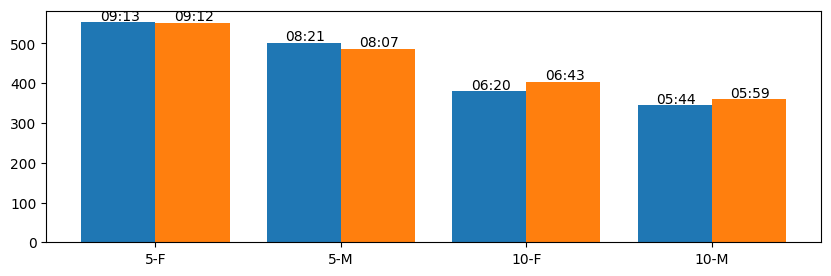

In [33]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df)

MEDIAN PACE (2023 vs 2024)

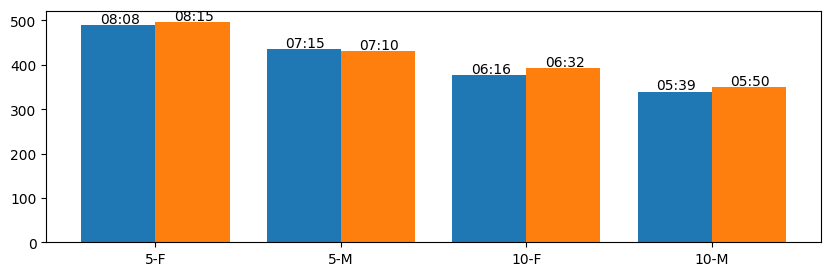

In [34]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df)

### 3.3. Personal performance

## 4. Hypothesis